In [918]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Exploration

In [919]:
ibm_df = pd.read_csv('IBM.csv')

In [920]:
ibm_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [921]:
ibm_df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


In [922]:
ibm_df.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9
1469,34,No,Research & Development,8,3,Medical,2,3,Married,4404,2,4,4


In [923]:
ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [924]:
#is there any null value?
null_value = ibm_df.isnull().values.any()
print('Is there any null value? : ', null_value)

Is there any null value? :  False


In [925]:
ibm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [926]:
ibm_df[ibm_df['Attrition'] == 'Yes'].count()

Age                        237
Attrition                  237
Department                 237
DistanceFromHome           237
Education                  237
EducationField             237
EnvironmentSatisfaction    237
JobSatisfaction            237
MaritalStatus              237
MonthlyIncome              237
NumCompaniesWorked         237
WorkLifeBalance            237
YearsAtCompany             237
dtype: int64

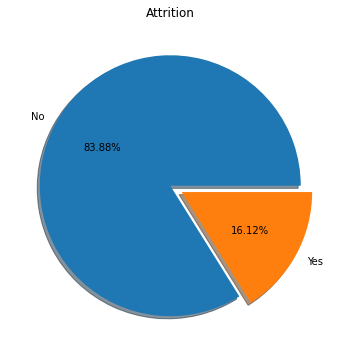

In [927]:
#distribution of Yes and No in Attrition
plt.figure(figsize=(10,6))
my_explode = (0, 0.1)
plt.pie(ibm_df['Attrition'].value_counts(), labels=ibm_df['Attrition'].value_counts().index, shadow=True, autopct='%1.2f%%', explode=my_explode)
plt.title('Attrition')
plt.show()
#is data unbalanced?

In [928]:
#which departments we are considering
ibm_df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [929]:
#what are the satisfaction values we are considering
ibm_df['JobSatisfaction'].unique()

array([4, 2, 3, 1])

In [930]:
#which education fields are in the analysis
ibm_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

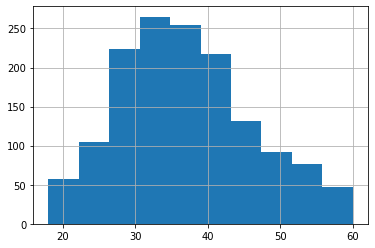

In [931]:
#what is the distribution of Age
ibm_df.Age.hist()

#Data Wrangling

In [932]:
#discretizing Age in 4 classes (number and lenght of the classes are based on the quartiles seen before in the 'description', to have almost 4 classes with the same numbers of osservations)
my_labels = ['18_30', '31_36', '37_43', '44_60']
ibm_df['Age'] = pd.cut(ibm_df['Age'], bins=[17, 30, 36,	43, 60], labels=my_labels)

In [933]:
ibm_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [934]:
ibm_df['Age'].unique()

['37_43', '44_60', '31_36', '18_30']
Categories (4, object): ['18_30' < '31_36' < '37_43' < '44_60']

In [935]:
#assigning a value for each Age class creating a new column (and ordering the columns)
ageclass = ibm_df.Age.replace( {'18_30':1, '31_36':2, '37_43':3, '44_60':4})
ibm_df['AgeClass'] = ageclass
ibm_df =ibm_df[['Age', 'AgeClass', 'Attrition',	'Department',	'DistanceFromHome',	'Education',	'EducationField',	'EnvironmentSatisfaction',	'JobSatisfaction',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'WorkLifeBalance',	'YearsAtCompany']]

In [936]:
ibm_copy = ibm_df.copy()
ibm_copy

,Age,AgeClass,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,3,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,4,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,3,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,2,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,1,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,2,No,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,37_43,3,No,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,18_30,1,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,44_60,4,No,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [937]:
#trasforming Yes and No values to 1 and 0
ibm_df['Attrition'].unique()
ibm_df.Attrition.replace( { 'Yes':1, 'No':0}, inplace=True)
ibm_df

,Age,AgeClass,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,3,1,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,44_60,4,0,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37_43,3,1,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,31_36,2,0,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,18_30,1,0,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,2,0,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,37_43,3,0,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,18_30,1,0,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,44_60,4,0,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [938]:
#trasforming MaritalStatus values to 1, 2 and 0
ibm_df['MaritalStatus'].unique()
ibm_df.MaritalStatus.replace( { 'Single':1, 'Married':2, 'Divorced':0}, inplace=True)
ibm_df

,Age,AgeClass,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,37_43,3,1,Sales,1,2,Life Sciences,2,4,1,5993,8,1,6
1,44_60,4,0,Research & Development,8,1,Life Sciences,3,2,2,5130,1,3,10
2,37_43,3,1,Research & Development,2,2,Other,4,3,1,2090,6,3,0
3,31_36,2,0,Research & Development,3,4,Life Sciences,4,3,2,2909,1,3,8
4,18_30,1,0,Research & Development,2,1,Medical,1,2,2,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,2,0,Research & Development,23,2,Medical,3,4,2,2571,4,3,5
1466,37_43,3,0,Research & Development,6,1,Medical,4,1,2,9991,4,3,7
1467,18_30,1,0,Research & Development,4,3,Life Sciences,2,2,2,6142,1,3,6
1468,44_60,4,0,Sales,2,3,Medical,4,2,2,5390,2,2,9


In [939]:
#removing the column WorkLifeBalance as it is not clear where the values come from, if from the employees or not, and since the values are too subjective and not relevant for the analysis
ibm_df.drop(columns=['WorkLifeBalance'], inplace=True)
ibm_df.head()

,Age,AgeClass,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,YearsAtCompany
0,37_43,3,1,Sales,1,2,Life Sciences,2,4,1,5993,8,6
1,44_60,4,0,Research & Development,8,1,Life Sciences,3,2,2,5130,1,10
2,37_43,3,1,Research & Development,2,2,Other,4,3,1,2090,6,0
3,31_36,2,0,Research & Development,3,4,Life Sciences,4,3,2,2909,1,8
4,18_30,1,0,Research & Development,2,1,Medical,1,2,2,3468,9,2


In [940]:
#Discretizing DistanceFromHome
Distance_labels = ['0_2', '3_6', '7_13', '14_28']
ibm_df['DistanceFromHome'] = pd.cut(ibm_df['DistanceFromHome'], bins=[0,	2,	6,	13,	29], labels=Distance_labels)

In [941]:
distanceclass = ibm_df.DistanceFromHome.replace( {'0_2':1, '3_6':2, '7_13':3, '14_28':4})
ibm_df['DistanceClass'] = distanceclass
ibm_df =ibm_df[['Age', 'AgeClass', 'Attrition',	'Department',	'DistanceFromHome','DistanceClass',	'Education',	'EducationField',	'EnvironmentSatisfaction',	'JobSatisfaction',	'MaritalStatus',	'MonthlyIncome',	'NumCompaniesWorked',	'YearsAtCompany']]

In [942]:
#Discretizing MonthlyIncome
Income_labels = ['(990.01, 5756.5]' ,'(5756.5, 10504.0]' ,'(10504.0, 15251.5]' ,'(15251.5, 19999.0]']
ibm_df['MonthlyIncome'] = pd.cut(ibm_df['MonthlyIncome'], bins=4, labels=Income_labels)
ibm_df['MonthlyIncome'].unique()

['(5756.5, 10504.0]', '(990.01, 5756.5]', '(15251.5, 19999.0]', '(10504.0, 15251.5]']
Categories (4, object): ['(990.01, 5756.5]' < '(5756.5, 10504.0]' < '(10504.0, 15251.5]' <
                         '(15251.5, 19999.0]']

In [943]:
incomeclass = ibm_df.MonthlyIncome.replace( {'(990.01, 5756.5]': 1, '(5756.5, 10504.0]': 2, '(10504.0, 15251.5]': 3, '(15251.5, 19999.0]': 4})
ibm_df['IncomeClass'] = incomeclass
ibm_df =ibm_df[['Age', 'AgeClass', 'Attrition',	'Department',	'DistanceFromHome','DistanceClass',	'Education',	'EducationField',	'EnvironmentSatisfaction',	'JobSatisfaction',	'MaritalStatus',	'MonthlyIncome', 'IncomeClass',	'NumCompaniesWorked',	'YearsAtCompany']]

In [944]:
ibm_df

,Age,AgeClass,Attrition,Department,DistanceFromHome,DistanceClass,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,IncomeClass,NumCompaniesWorked,YearsAtCompany
0,37_43,3,1,Sales,0_2,1,2,Life Sciences,2,4,1,"(5756.5, 10504.0]",2,8,6
1,44_60,4,0,Research & Development,7_13,3,1,Life Sciences,3,2,2,"(990.01, 5756.5]",1,1,10
2,37_43,3,1,Research & Development,0_2,1,2,Other,4,3,1,"(990.01, 5756.5]",1,6,0
3,31_36,2,0,Research & Development,3_6,2,4,Life Sciences,4,3,2,"(990.01, 5756.5]",1,1,8
4,18_30,1,0,Research & Development,0_2,1,1,Medical,1,2,2,"(990.01, 5756.5]",1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,31_36,2,0,Research & Development,14_28,4,2,Medical,3,4,2,"(990.01, 5756.5]",1,4,5
1466,37_43,3,0,Research & Development,3_6,2,1,Medical,4,1,2,"(5756.5, 10504.0]",2,4,7
1467,18_30,1,0,Research & Development,3_6,2,3,Life Sciences,2,2,2,"(5756.5, 10504.0]",2,1,6
1468,44_60,4,0,Sales,0_2,1,3,Medical,4,2,2,"(990.01, 5756.5]",1,2,9


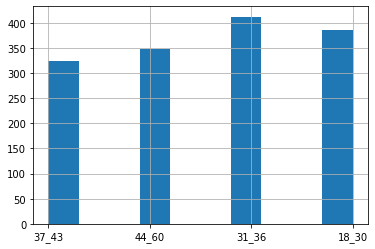

In [945]:
ibm_df.Age.hist()

In [946]:
ibm_df[['Age', 'Attrition']].groupby('Age').mean()
#in average young employees tend to have more attrition

,Attrition
Age,
18_30,0.259067
31_36,0.160194
37_43,0.089231
44_60,0.121037


In [947]:
ibm_df.groupby('MaritalStatus')['Attrition'].count()

MaritalStatus
0    327
1    470
2    673
Name: Attrition, dtype: int64

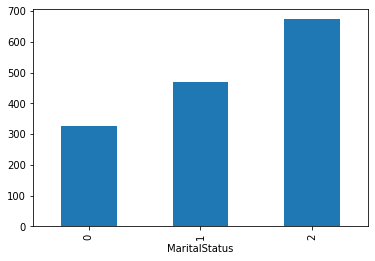

In [948]:
ibm_df.groupby('MaritalStatus')['Attrition'].count().plot.bar()

In [949]:
ibm_df[['MaritalStatus', 'Attrition']].groupby('MaritalStatus').mean()

,Attrition
MaritalStatus,
0,0.100917
1,0.255319
2,0.124814


In [950]:
ibm_df[['MonthlyIncome', 'Attrition']].groupby('MonthlyIncome').mean()

,Attrition
MonthlyIncome,
"(990.01, 5756.5]",0.196610
"(5756.5, 10504.0]",0.142012
"(10504.0, 15251.5]",0.086957
"(15251.5, 19999.0]",0.037879


In [951]:
ibm_corr = ibm_df.corr()
ibm_corr

,AgeClass,Attrition,DistanceClass,Education,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,IncomeClass,NumCompaniesWorked,YearsAtCompany
AgeClass,1.000000,-0.147795,-0.042802,0.189630,0.001743,-0.002317,0.031660,0.448905,0.282084,0.293351
Attrition,-0.147795,1.000000,0.075887,-0.031373,-0.103369,-0.103481,-0.011195,-0.139599,0.043494,-0.134392
DistanceClass,-0.042802,0.075887,1.000000,0.019627,-0.008212,-0.019372,0.004299,-0.038488,-0.030735,-0.004910
Education,0.189630,-0.031373,0.019627,1.000000,-0.027128,-0.011296,0.000107,0.076119,0.126317,0.069114
EnvironmentSatisfaction,0.001743,-0.103369,-0.008212,-0.027128,1.000000,-0.006784,-0.022628,-0.001807,0.012594,0.001458
JobSatisfaction,-0.002317,-0.103481,-0.019372,-0.011296,-0.006784,1.000000,0.001494,-0.002149,-0.055699,-0.003803
MaritalStatus,0.031660,-0.011195,0.004299,0.000107,-0.022628,0.001494,1.000000,0.025198,-0.031652,0.014779
IncomeClass,0.448905,-0.139599,-0.038488,0.076119,-0.001807,-0.002149,0.025198,1.000000,0.137323,0.471088
NumCompaniesWorked,0.282084,0.043494,-0.030735,0.126317,0.012594,-0.055699,-0.031652,0.137323,1.000000,-0.118421
YearsAtCompany,0.293351,-0.134392,-0.004910,0.069114,0.001458,-0.003803,0.014779,0.471088,-0.118421,1.000000


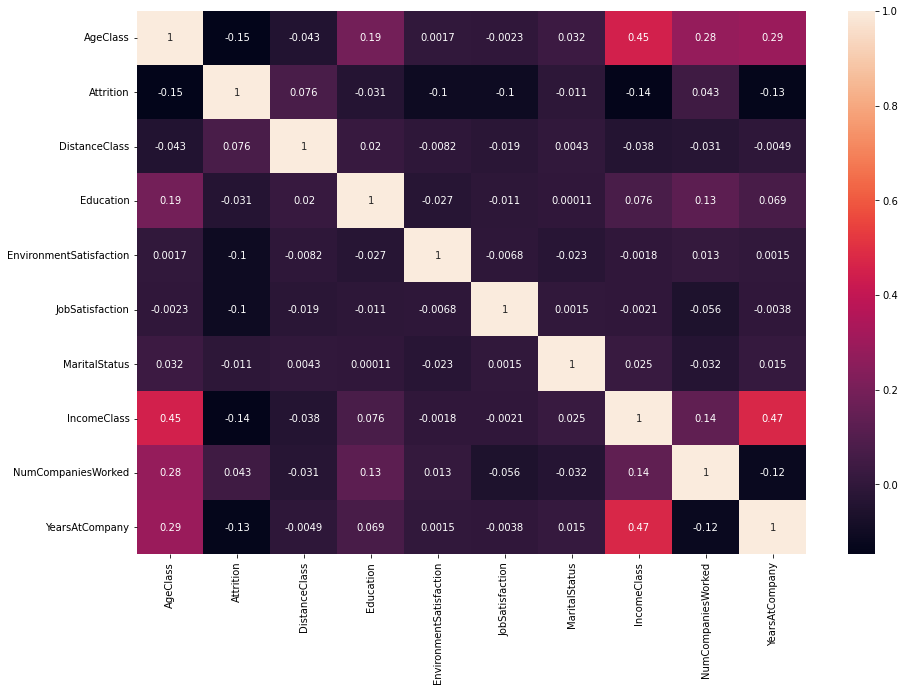

In [952]:
plt.figure(figsize=(15,10))
sns.heatmap(ibm_corr, annot=True)

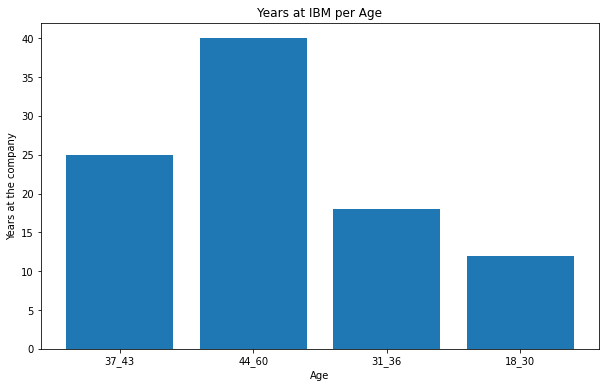

In [953]:
plt.figure(figsize=(10,6))
plt.bar(ibm_df['Age'], ibm_df['YearsAtCompany'])
plt.title('Years at IBM per Age')
plt.xlabel('Age')
plt.ylabel('Years at the company')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

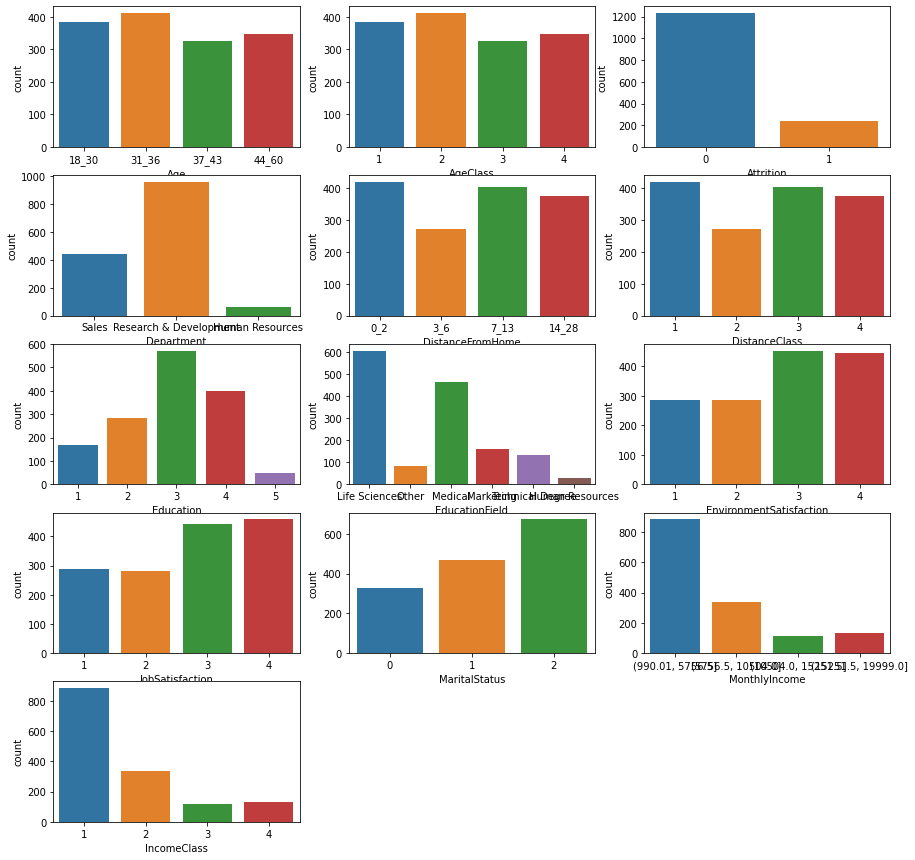

In [954]:
n = 3
fig_1 = plt.figure(figsize=(15,15))
for i in range(len(ibm_df.columns)):
    if len(ibm_df[ibm_df.columns[i]].unique()) <= 6:
        plt.subplot(int(len(ibm_df.columns)/n),n,i+1)
        sns.countplot(ibm_df[ibm_df.columns[i]])
plt.show()

#Classification model

What we are going to do now is trying to predict the attrition of employees using the random forest classification and the Gaussian model.
In particular we are trying to predict the attrition based on the age class, Monthly Income and Years at the company (being the variables more correlated(inversely) to the attrition of employees) and verify the accuracy of it.
First we will do that using the original data (wich is unbalanced) and then we will try to balance the data (in particular the yes and no values of the attribute 'Attrition') using an undersampling technique.

In [955]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [956]:
y = ibm_df['Attrition']
x = ibm_df['AgeClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

RandomForestClassifier

In [957]:
model = RandomForestClassifier(random_state=42)

In [958]:
x_train = x_train.to_numpy().reshape(-1, 1)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [959]:
x_test = x_test.to_numpy().reshape(-1, 1)
y_pred = model.predict(x_test)

In [960]:
accuracy_score(y_test, y_pred)

0.8384353741496599

In [961]:
def train_model(x0, y0, model, random_state = 42, test_size = 0.4):
  x_train, x_test, y_train, y_test = train_test_split(x0, y0, test_size=test_size, stratify=y0, random_state=random_state)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print('Accuracy score: ', accuracy_score(y_test, y_pred))

In [962]:
x0 = ibm_df[['IncomeClass']]
y0 = ibm_df.Attrition
train_model(x0, y0, RandomForestClassifier(random_state = 42))

Accuracy score:  0.8384353741496599


GaussianNB

In [963]:
y = ibm_df['Attrition']
x = ibm_df['AgeClass']
train_model(x0, y0, GaussianNB())
sum(y_pred == y_test) / len(y_pred)

Accuracy score:  0.8384353741496599


0.8384353741496599

In [964]:
x = ibm_df[['AgeClass', 'IncomeClass', 'YearsAtCompany']]
train_model(x, y, RandomForestClassifier(), random_state=42, test_size=0.4)

Accuracy score:  0.8214285714285714


RandomForestClassifier with undersampling data

In [965]:
yes_count = ibm_df[ibm_df['Attrition'] == 1].count()
class_1 = int(yes_count[1])
class_1

237

In [966]:
c1 = ibm_df[ibm_df['Attrition'] == 1]
c0 = ibm_df[ibm_df['Attrition'] == 0]
ibm_df_0 = c0.sample(class_1)

In [967]:
undersampled_ibm_df = pd.concat([ibm_df_0,c1],axis=0)

In [968]:
undersampled_ibm_df.Attrition.value_counts()

0    237
1    237
Name: Attrition, dtype: int64

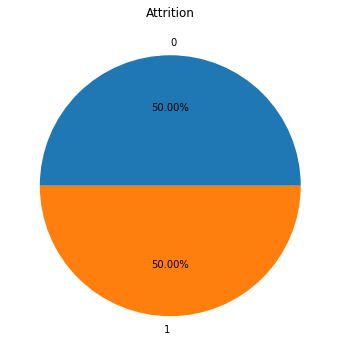

In [969]:
plt.figure(figsize=(10,6))
plt.pie(undersampled_ibm_df['Attrition'].value_counts(), labels=undersampled_ibm_df['Attrition'].value_counts().index, autopct='%1.2f%%')
plt.title('Attrition')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


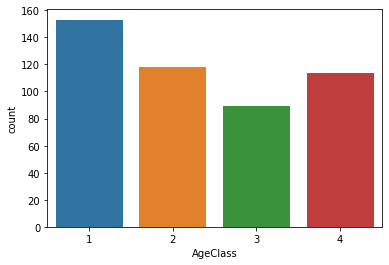

In [970]:
sns.countplot(undersampled_ibm_df.AgeClass)

In [971]:
undersampled_ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1158 to 1461
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      474 non-null    category
 1   AgeClass                 474 non-null    int64   
 2   Attrition                474 non-null    int64   
 3   Department               474 non-null    object  
 4   DistanceFromHome         474 non-null    category
 5   DistanceClass            474 non-null    int64   
 6   Education                474 non-null    int64   
 7   EducationField           474 non-null    object  
 8   EnvironmentSatisfaction  474 non-null    int64   
 9   JobSatisfaction          474 non-null    int64   
 10  MaritalStatus            474 non-null    int64   
 11  MonthlyIncome            474 non-null    category
 12  IncomeClass              474 non-null    int64   
 13  NumCompaniesWorked       474 non-null    int64   
 14  YearsA

In [972]:
y = undersampled_ibm_df['Attrition']
x = undersampled_ibm_df['AgeClass']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, stratify=undersampled_ibm_df['Attrition'])

In [973]:
model = RandomForestClassifier()

In [974]:
x_train = x_train.to_numpy().reshape(-1, 1)
model.fit(x_train, y_train)

RandomForestClassifier()

In [975]:
x_test = x_test.to_numpy().reshape(-1, 1)
y_pred = model.predict(x_test)

In [976]:
accuracy_score(y_test, y_pred)

0.5789473684210527